In [102]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless = False)

In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_soup = soup(html, 'html.parser')
mars_weather_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [12]:
mars_weather_data = mars_weather_soup.find_all('tr')
mars_weather_data

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [16]:
mars_weather_data[1].text

'\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n'

In [19]:
mars_weather_list = [row.text for row in mars_weather_data]
mars_weather_list

['\nid\nterrestrial_date\nsol\nls\nmonth\nmin_temp\npressure\n',
 '\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n',
 '\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n',
 '\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n',
 '\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n',
 '\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n',
 '\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n',
 '\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n',
 '\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n',
 '\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n',
 '\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n',
 '\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n',
 '\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n',
 '\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n',
 '\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n',
 '\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n',
 '\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n',
 '\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n',
 '\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n',
 '\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.

In [24]:
type(mars_weather_list[1])

str

In [71]:
# Clean each row to separate the column values from the table
import re

row = re.sub(r'[\n]','', mars_weather_list[1], 1)
row = re.sub(f'[\n]', ',', row)
row = row.split(',')
row.pop()
row

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [9]:
# Extract all rows of data
mars_weather_headers = mars_weather_soup.find_all('th')
mars_weather_headers

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [11]:
headers_list = [header.text for header in mars_weather_headers]
headers_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [73]:
# Iterate through each row to separate the column values, then add each value to a list of like values.
rows = []

for row in mars_weather_list[1:]:
    row = re.sub(r'[\n]', '', row, 1)
    row = re.sub(f'[\n]', ',', row)
    row = row.split(',')
    row.pop()
    rows.append(row)

rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [75]:
mars_weather_df = pd.DataFrame(rows, columns = headers_list)
mars_weather_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [81]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [90]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)

mars_weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [92]:
# 1. How many months are there on Mars?
max(mars_weather_df['month'])

12

In [93]:
# 2. How many Martian days' worth of data are there?
# Note that sols are Martian days since Curiosity landed
total_martian_days = max(mars_weather_df['sol']) - min(mars_weather_df['sol'])
total_martian_days

1967

In [130]:
# 3. What is the average low temperature by month?
mean_min_temp = mars_weather_df['min_temp'].groupby(mars_weather_df['month']).mean()
mean_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Minimum Temperature by Month on Mars')

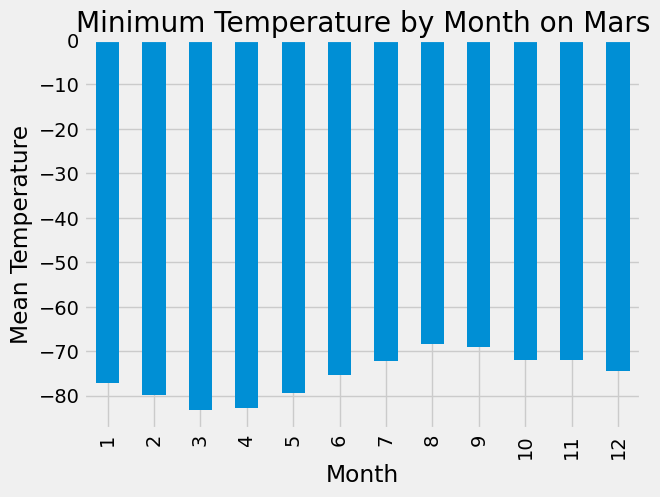

In [131]:
# Plot the average temperature by month
#style.use('fivethirtyeight') 

mean_min_temp.plot.bar()


plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.title('Minimum Temperature by Month on Mars')


<AxesSubplot:xlabel='month'>

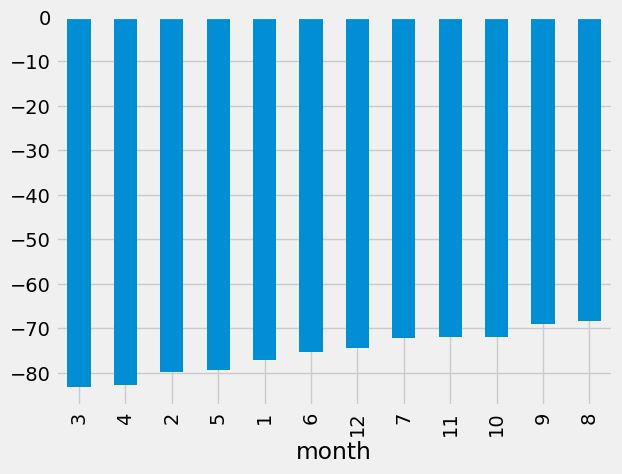

In [135]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temps = mean_min_temp.sort_values()
sorted_temps.plot.bar()

In [136]:
# 4. Average pressure by Martian month
pressure_by_month = mars_weather_df['pressure'].groupby(mars_weather_df['month']).mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

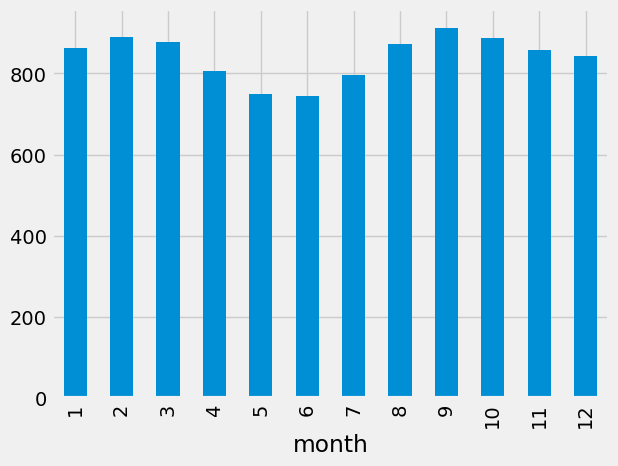

In [137]:
# Plot the average pressure by month
pressure_by_month.plot.bar()

In [143]:
mars_weather_df['terrestrial_date'][0]

Timestamp('2012-08-16 00:00:00')

In [149]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#(0.5 <= df['two']) and (df['two'] < 0.5)
earth_year = mars_weather_df['terrestrial_date'] <= '2013-08-15 00:00:00'
earth_year.tail(10)

1857    False
1858    False
1859    False
1860    False
1861    False
1862    False
1863    False
1864    False
1865    False
1866    False
Name: terrestrial_date, dtype: bool

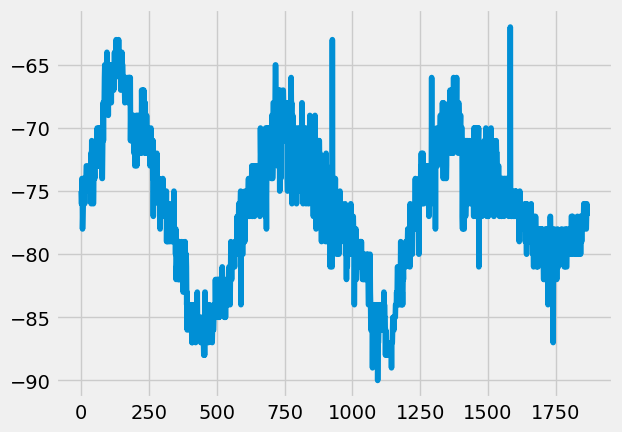

In [148]:
mars_weather_df['min_temp'].plot()
plt.show()

In [151]:
# Write the data to a CSV
mars_weather_df.to_csv('C:\Users\veach\Documents\UCF Data Analytics\Module_11\Challenge')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3257030548.py, line 2)

In [ ]:
browser.quit()